Dear Reviewer,

Nice to e-meet you. Thank you for reviewing my work.

Rena Bracha

<hr style="border: 2px solid green;" />

Hello, Rena!🤚 

My name is Kseniya Vishnevskaya. I'm going to review your project 😊 

✏️You can find my comments in <font color='green'>green</font>, <font color='orange'>yellow</font> or <font color='red'>red</font> boxes like this:

<div style="border:solid green 2px; padding: 20px"> <b>Success:</b><br>
    I'm using green color if everything is done perfectly.</div>       
<br>
<div style="border:solid orange 2px; padding: 20px"> <b>Remarks:</b><br>
    if I can give some recommendations</div>   
<br>
<div style="border:solid red 2px; padding: 20px"> <b>Needs fixing:</b><br>
    if the block requires some corrections. Work can't be accepted with the red comments</div>
 
Further in the file you can see my comments, try to take them into account when performing the next tasks. **Please, don't delete them.** :)

Let's work on the project in dialogue: if you change something in the project or respond to my comments, write about it. It will be easier for me to track the changes if you highlight your comments:

<div class="alert alert-info" style="border:solid blue 2px; padding: 20px"> <b>Student comment:</b> In the blue boxes you can leave comments and ask questions.</div>


<hr style="border: 2px solid green;" />

### <font color='orange'>General feedback</font>

<div style="border:solid green 2px; padding: 20px"> <b>Success :</b><br>
    Your project looks pretty good! 😊. It's clear you've put a lot of effort into it. I especially  liked the style, code formatting, detailed conclusions, visualization you've made and testing hypothesis. Glad to say that your project  has been accepted. Congratulations! 🥳 Good luck on the next sprint! </div>

<div style="border:solid orange 2px; padding: 20px"> <b>Remarks :</b><br>
    There are some comments for further improvement. They don't mean that you did anything wrong, but they're things we wanted to point out that can help you further develop your skills. 

And also I leave several links that can help you to make your further projects even better:

* Interesting charts in matplotlib library:

    <a>https://www.machinelearningplus.com/plots/top-50-matplotlib-visualizations-the-master-plots-python/</a>

*  Some information about T-test:

    <a>https://towardsdatascience.com/inferential-statistics-series-t-test-using-numpy-2718f8f9bf2f</a>
        
      <a>https://www.hackdeploy.com/python-t-test-a-friendly-guide/<a>
          

* Some information about pandas:
     
   <a> https://towardsdatascience.com/style-pandas-dataframe-like-a-master-6b02bf6468b0</a>
   
</div>

## Research on Zuber, a ride-sharing company
Zuber is a new comer to the ride-sharing industry. They are about to launch their business in Chicago. They have some data and want to find patterns: what are passenger preferences and how do external factors such as weather impact on rides?

**Project outline** 
<br>Note: this python project refers to "Step 4. Exploratory data analysis (Python)" and "Step 5. Testing hypotheses (Python)" of the project description available on the Platform. This is a continuation of the analysis previously conducted in SQL (Steps. 1-3 on the Platform).

* Study a database.
* Analyze data from competitors.
* Test a hypothesis about the impact of weather on ride durations.
* Conclusion

**Datasets**
<br>In addition to the data you retrieved in the previous tasks, we have been given the following CSVs:
1. /datasets/project_sql_result_01.csv
<br>This contains the following data:
<br>o company_name: taxi company name
<br>o trips_amount: the number of rides for each taxi company on November 15-16, 2017



2. /datasets/project_sql_result_04.csv
<br>This contains the following data:
<br>o dropoff_location_name: Chicago neighborhoods where rides ended
<br>o average_trips: the average number of rides that ended in each neighborhood in November 2017.



3. /datasets/project_sql_result_07.csv
<br>This contains the result of the last query ("Working with Databases", task 6/6) — the data on rides from the Loop to O'Hare International Airport. These are the table's field values:
<br>o start_ts: pickup date and time
<br>o weather_conditions: weather conditions at the moment the ride started
<br>o duration_seconds: ride duration in seconds

## Table of Contents <a class="anchor" id="table_of_contents"></a>

* [Loading Files and Studying General Information](#chapter3)
    * [Libraries](#section_3_1)
    * [Data Files](#section_3_2)
    * [Preliminary Data Exploration](#section_3_3)
    * [Conclusion](#section_3_4)
* [Data Preprocessing](#chapter4)
    * [Column Value Renaming](#section_4_1)
    * [Data Type Conversions ](#section_4_2)
    * [Identifying Duplicates](#section_4_3)                    
    * [Conclusion](#section_4_4)
* [Data Analysis](#chapter5)
    * [Identify the top 10 neighborhoods in terms of drop-offs](#section_5_1)
    * [Make graphs: taxi companies and number of rides, top 10 neighborhoods by number of dropoffs](#section_5_2)
    * [Draw conclusions based on each graph and explain the results](#section_5_3)
* [Testing Hypotheses](#chapter6)
    * [Hypothesis: "The average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays."](#section_6_1)
    * [Conclusion](#section_6_2)
* [Overal Conclusions](#chapter7)

<div style="border:solid green 2px; padding: 20px"> <b>Success:</b><br>
    Excellent work! Thank you for writing a detailed description of the project, the intaractive project plan, and what tasks you are going to accomplish in the process. It's great that you also have a description of the data 👍</div>    

## Loading Files and Studying General Information <a class="anchor" id="chapter3"></a>

[Go back to the Table of Contents](#table_of_contents)

### Libraries <a class="anchor" id="section_3_1"></a>

[Go back to the Table of Contents](#table_of_contents)

In [49]:
# Import sys so no warnings will be issued. 
import sys
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")
    
# Import various libraries.
import pandas as pd
import numpy as np
from functools import reduce
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
import string
import re

### Data Files <a class="anchor" id="section_3_2"></a>

[Go back to the Table of Contents](#table_of_contents)

In [50]:
# Enable data file loading in two environments: one local and one on the Platform. 
# For the csv files, define the separator to be a comma. 
try:
    data01 = pd.read_csv('project_sql_result_01.csv', sep = ',')
    data04 = pd.read_csv('project_sql_result_04.csv', sep = ',')
    data07 = pd.read_csv('project_sql_result_07.csv', sep = ',')
    
except:
    data01 = pd.read_csv('/datasets/project_sql_result_01.csv', sep = ',')
    data04 = pd.read_csv('/datasets/project_sql_result_04.csv', sep = ',')
    data07 = pd.read_csv('/datasets/project_sql_result_07.csv', sep = ',')

<div style="border:solid green 2px; padding: 20px"> <b>Success:</b><br>
    Very well that you keep all libraries in a separate cell and use try-except method. </div> 

<div style="border:solid orange 2px; padding: 20px"> <b>Remarks:</b><br>
    It is better to give the tables more meaningful names, so it was immediately clear what data are contained in them.</div>   

### Preliminary Data Exploration <a class="anchor" id="section_3_3"></a>

[Go back to the Table of Contents](#table_of_contents)

**data01**
<br>o company_name: taxi company name
<br>o trips_amount: the number of rides for each taxi company on November 15-16, 2017

In [51]:
# Get a first impression of the data.
#data01.head()
#data01.tail()
data01.sample(5)

,company_name,trips_amount
21,American United,1404
46,3620 - 52292 David K. Cab Corp.,21
32,Leonard Cab Co,147
10,Choice Taxi Association,5015
33,Metro Jet Taxi A,146


'company_name': inconsistent format - some names have prefixes (e.g. number - number ). When we run a search on the column, we will look for a partial string inside the names so the presence or absence of a prefix will not interfere. But given how it is written right now, it will not allow the names to be sorted alphabetically. We will investigate further later.

In [52]:
# View general information.
data01.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
company_name    64 non-null object
trips_amount    64 non-null int64
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


* No missing values in either one of the columns. 
* The correctness of the data type of 'company_name' is confirmed. 
* The correctness of the data type of 'trips_amount' is confirmed. 

In [53]:
# View description statistics.
data01.describe()

,trips_amount
count,64.000000
mean,2145.484375
std,3812.310186
min,2.000000
25%,20.750000
50%,178.500000
75%,2106.500000
max,19558.000000


We can tell from min, max and std that the difference in the number of rides between popular and not-so-popular cab companies is very large. 

In [54]:
# Look at the unique values of the categorical variable.
# Using unique() rather than value_counts() so I can check all the values. 
data01['company_name'].unique()

array(['Flash Cab', 'Taxi Affiliation Services', 'Medallion Leasing',
       'Yellow Cab', 'Taxi Affiliation Service Yellow',
       'Chicago Carriage Cab Corp', 'City Service', 'Sun Taxi',
       'Star North Management LLC', 'Blue Ribbon Taxi Association Inc.',
       'Choice Taxi Association', 'Globe Taxi',
       'Dispatch Taxi Affiliation', 'Nova Taxi Affiliation Llc',
       'Patriot Taxi Dba Peace Taxi Association',
       'Checker Taxi Affiliation', 'Blue Diamond',
       'Chicago Medallion Management', '24 Seven Taxi',
       'Chicago Medallion Leasing INC', 'Checker Taxi', 'American United',
       'Chicago Independents', 'KOAM Taxi Association', 'Chicago Taxicab',
       'Top Cab Affiliation', 'Gold Coast Taxi',
       'Service Taxi Association', '5 Star Taxi', '303 Taxi',
       'Setare Inc', 'American United Taxi Affiliation', 'Leonard Cab Co',
       'Metro Jet Taxi A', 'Norshore Cab', '6742 - 83735 Tasha Ride Inc',
       '3591 - 63480 Chuks Cab', '1469 - 64126 Omar Jada'

Some company names are prefixed with "number-number". We will investigate this further later. 

**data04**
<br>o dropoff_location_name: Chicago neighborhoods where rides ended
<br>o average_trips: the average number of rides that ended in each neighborhood in November 2017.

In [55]:
# Get a first impression of the data.
#data04.head()
#data04.tail()
data04.sample(5)

,dropoff_location_name,average_trips
30,United Center,178.900000
48,Austin,44.433333
67,Auburn Gresham,15.166667
66,Washington Park,16.033333
89,Mount Greenwood,3.137931


Round off 'average_trips' to the nearest whole number. 

In [56]:
# View general information.
data04.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
dropoff_location_name    94 non-null object
average_trips            94 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


* No missing values.
* The correctness of the data type of 'dropoff_location_name' is confirmed.
* Convert the data type of 'average_trips' from float to int since trips should be counted in whole numbers.

In [57]:
# View description statistics.
data04.describe()

,average_trips
count,94.000000
mean,599.953728
std,1714.591098
min,1.800000
25%,14.266667
50%,52.016667
75%,298.858333
max,10727.466667


We can tell from min, max and std that the difference in the number of visits between popular and not-so-popular neighbourhoods is very large. 

In [58]:
# Look at the unique values of the categorical variable. 
# Using unique() rather than value_counts() so I can check all the values. 
#data04['dropoff_location_name'].unique()

**data07**
<br>This contains the result of the last query — the data on rides from the Loop to O'Hare International Airport. These are the table's field values:
<br>o start_ts: pickup date and time
<br>o weather_conditions: weather conditions at the moment the ride started
<br>o duration_seconds: ride duration in seconds

In [59]:
# Get a first impression of the data.
#data07.head()
#data07.tail()
data07.sample(5)

,start_ts,weather_conditions,duration_seconds
1041,2017-11-11 08:00:00,Good,1200.0
620,2017-11-11 10:00:00,Good,1200.0
193,2017-11-25 05:00:00,Good,1487.0
878,2017-11-11 10:00:00,Good,1560.0
1061,2017-11-18 16:00:00,Bad,2186.0


<div style="border:solid orange 2px; padding: 20px"> <b>Remarks:</b><br>
    
   If you notice something unusual in the data when you use `sample()`, you can fix the output of certain lines using the `random_state` parameter. Please, visit this link:

  <a>https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sample.html</a>
</div>   
<br>

In [60]:
# View general information.
data07.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
start_ts              1068 non-null object
weather_conditions    1068 non-null object
duration_seconds      1068 non-null float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


* No missing values.
* Convert the data type of 'start_ts' from object to datetime to enable operations in the column. 
* The correctness of the data type of 'weather_conditions' is confirmed.
* Convert the data type of 'duration_seconds' from float to int since there is no need for such precision in this context.

In [61]:
# View description statistics.
data07.describe()

,duration_seconds
count,1068.000000
mean,2071.731273
std,769.461125
min,0.000000
25%,1438.250000
50%,1980.000000
75%,2580.000000
max,7440.000000


<div style="border:solid green 2px; padding: 20px"> <b>Success:</b><br>
  
   I like that you use a variety of methods, including `sample()`, `info()` and  `describe()` when studying general information in tables. Well done!</div>  

In [62]:
# Check where 'duration_seconds' is 0. 
zero_entries = data07.query('duration_seconds == 0')
zero_entries

,start_ts,weather_conditions,duration_seconds
163,2017-11-11 09:00:00,Good,0.0
168,2017-11-11 07:00:00,Good,0.0
204,2017-11-18 19:00:00,Good,0.0
552,2017-11-04 01:00:00,Good,0.0
801,2017-11-04 09:00:00,Good,0.0
1063,2017-11-25 11:00:00,Good,0.0


There is no 'rain' or 'storm' - it is all sunny weather, but it lasted zero seconds? Probably, these are record logging errors. 

In [63]:
# Calculate the percentage of the zero entry records in the dataset. 
zero_values = zero_entries.count().to_frame('zero_values')
zero_values['%'] = round(zero_entries.count()/len(data07) * 100, 2) 
zero_values

,zero_values,%
start_ts,6,0.56
weather_conditions,6,0.56
duration_seconds,6,0.56


In [64]:
# Check the descriptive statistics of 'Good' weather records which are greater than 0 seconds. 
data07[(data07['weather_conditions'] == "Good") & (data07['duration_seconds'] > 0)].describe()

,duration_seconds
count,882.000000
mean,2013.278912
std,743.565217
min,60.000000
25%,1397.250000
50%,1800.000000
75%,2460.000000
max,7440.000000


The average duration is 34 minutes while the maximum is 2 hours with a standard deviation of 12 minutes. (This is supposed to be Chicago. Not Norway in January?!) Luckily, this accounts for 0.56% of the dataset only. Let's leave the values as they are without replacing them. 

<div style="border:solid green 2px; padding: 20px"> <b>Success:</b><br>
    😄 Yep, agree. That's a very reasonable point.</div>

In [65]:
# Look at the unique values of the categorical variable. 
data07['weather_conditions'].value_counts()

Good    888
Bad     180
Name: weather_conditions, dtype: int64

The two sample sizes are very different.

### Conclusion <a class="anchor" id="section_3_4"></a>

[Go back to the Table of Contents](#table_of_contents)

**data01**
<br>Total rows: 64
<br>Total columns: 2

* Data contained
<br>o company_name: taxi company name
<br>o trips_amount: the number of rides for each taxi company on November 15-16, 2017


* 'company_name'
<br>o Inconsistent format - some names are prefixed with "number-number". Search will be fine if we look for substrings inside the names. Alphabetical sorting will be a problem. Will investigate further and handle appropriately later.
<br>o No missing values. 
<br>o The data type is correct.  


* 'trips_amount'
<br>o No missing values. 
<br>o The data type is correct. 
<br>o We can see in the descriptive statsitics the difference in the number of rides between popular and not-so-popular cab companies is very large. 



**data04**
<br>Total rows: 94
<br>Total columns: 2

* Data contained
<br>o dropoff_location_name: Chicago neighborhoods where rides ended
<br>o average_trips: the average number of rides that ended in each neighborhood in November 2017.


* 'dropoff_location_name'
<br>o No missing values. 
<br>o The data type is correct.  


* 'average_trips'
<br>o No missing values. 
<br>o Convert the data type from float to int.
<br>o We can see in the descriptive statsitics the difference in the number of visits between popular and not-so-popular neighbourhoods is very large. 



**data07**
<br>Total rows: 1068
<br>Total columns: 3

* Data contained
<br>o start_ts: pickup date and time
<br>o weather_conditions: weather conditions at the moment the ride started
<br>o duration_seconds: ride duration in seconds


* 'start_ts'
<br>o No missing values. 
<br>o Convert the data type from object to datetime (format='%Y-%m-%d %H:%M:%S').
<br>o We can see in the descriptive statsitics the difference in the number of visits between popular and not-so-popular neighbourhoods is very large. 


* 'weather_conditions'
<br>o No missing values.
<br>o The data type is correct.  


* 'duration_seconds'
<br>o No missing values.
<br>o Convert the data type from float to int.

<div style="border:solid green 2px; padding: 20px"> <b>Success:</b><br>
    Well, it's all good here. Thanks for the detailed conclusions 🙂 </div>

## Data Preprocessing <a class="anchor" id="chapter4"></a>

[Go back to the Table of Contents](#table_of_contents)

### Column Value Renaming <a class="anchor" id="section_4_1"></a>

[Go back to the Table of Contents](#table_of_contents)

In [66]:
# View the unique values. 
#sorted(data01['company_name'].unique())

Some cab company names have prefixes (e.g. "number-number"). this will not allow for alphabetical sorting. 


Remove the following patterns of characters sequentially (i.e. after removing the first pattern, look for the second pattern, after that, for the third pattern) and replacing them with an empty string (i.e. eliminate the substring):

    1. "any sequence of numbers" "space" "hyphen" "space" "any sequence of numbers" "space" 
       (e.g. '0118 - 42111 Godfrey S.Awir')
    2. "any sequence of numbers" "space" "hyphen" "space" "any sequence of letters""space" "any sequence of letters" "comma"
       (e.g. '3721 - Santamaria Express, Alvaro Santamaria')
    3. "hyphen" "space" "any sequence of letters" "space" "any sequence of letters" "comma" "space"
       (e.g. '- Felman Corp, Manuel Alonso')
    4. "any sequence of numbers" "space" "hyphen" "space"
       (e.g. '6574 - Babylon Express Inc.')
    
       
Note: 
* '24 Seven Taxi', '303 Taxi' and '5 Star Taxi' are exceptions in that the number is part of the company name. So the number will not be removed from these. 
* After checking on the WWW, a conclusion has been reached to keep 'Chicago Medallion Leasing INC' and 'Chicago Medallion Management' entries separate as they are now in the dataset, although they are an affiliate company to each other. Similarly, City Service Taxi is an affiliate company of Medallion Management Corp. The same goes for the possible link between American United Taxi Affiliation and Taxi Affiliation Services since they are both at the same address (3351 W Addison St. Chicago). There may be a good reason as to why the separate entries were made (perhaps, it depends on the history of how the businesses were developed and merged). Had this been in a real work scenario, I would call the taxi companies in Chicago to clarify. 

In [67]:
# Make a copy of the original 'company_name' column and keep it.
company_name_copy = data01['company_name']
data01['company_name_tidy'] = company_name_copy

# Search for the pattern and remove it in the order that they appear in the list. 
patterns = [r'\d+ - \d+ ', r'\d+ - [A-z]+ [A-z]+, ', r'- [A-z]+ [A-z]+, ', r'\d+ - ']
for i in range (len(patterns)):
    data01['company_name_tidy'] = data01['company_name_tidy'].str.replace(patterns[i], '')

# Verify it worked.
#sorted(data01['company_name_tidy'].unique())

# Make sure all 64 values are accounted for.
#data01['company_name_tidy'].count()

<div style="border:solid green 2px; padding: 20px"> <b>Success:</b><br>
    Wow, it's really great that you use a regular expression in your project!</div>  

<div style="border:solid orange 2px; padding: 20px"> <b>Remarks:</b><br>
    Using a regular expression, you can do this part without the loop. This link can be helpful:
        
<a>https://stackoverflow.com/a/22591024/11664121</a> <br></div> 

There seem to be duplicates due to inconsistent naming (e.g. 'Chicago Medallion Leasing INC' and 'Medallion Leasin').

Combine 'trips_amount' then remove the duplicates.

In [68]:
# Get the unique values and store them in a list. 
my_list = data01['company_name_tidy'].unique().tolist()

# Check which string is contained inside which string to look for similar company names in order to find duplicates.
data01['matched'] = data01['company_name_tidy'].apply(lambda x: ', '.join([m for m in my_list if m in x])).replace('',np.nan)

# Count the number of commas in the list in each row of 'matched', i.e. the duplicates.
data01['comma_count'] = data01['matched'].apply(lambda x: str.count(x, ','))

# List the duplicate company names.
data01.query('comma_count > 0')

,company_name,trips_amount,company_name_tidy,matched,comma_count
15,Checker Taxi Affiliation,2216,Checker Taxi Affiliation,"Checker Taxi Affiliation, Checker Taxi",1
19,Chicago Medallion Leasing INC,1607,Chicago Medallion Leasing INC,"Medallion Leasing, Chicago Medallion Leasing INC",1
31,American United Taxi Affiliation,210,American United Taxi Affiliation,"American United, American United Taxi Affiliation",1


In [69]:
# Check 'trips_amount' for the three company name duplicates. COMMENT THIS OUT
data01[data01['company_name_tidy'].isin(["Checker Taxi", "Medallion Leasing", "American United"])]

,company_name,trips_amount,company_name_tidy,matched,comma_count
2,Medallion Leasing,10367,Medallion Leasing,Medallion Leasing,0
20,Checker Taxi,1486,Checker Taxi,Checker Taxi,0
21,American United,1404,American United,American United,0


Side Note to the creator of the project: project_sql_result_01.csv available for download seems to be different from the one in /dataset/. The downloadable csv file contains "Medallion Leasin" as opposed to "Medallion Leasing".

In [70]:
# Make a copy of trips_amount to keep the original values.
trips_amount_copy = data01['trips_amount']
data01['trips_amount_tidy'] = trips_amount_copy

# Make a dictionary of the 'company_name' and 'trips_amount' to combine. 
to_combine = {"Checker Taxi Affiliation": 1486, "Chicago Medallion Leasing INC": 10367, "American United Taxi Affiliation": 1404}

for key, value in to_combine.items():
    data01.loc[data01['company_name_tidy'] == key, 'trips_amount_tidy'] += value

# Delete the row for "Checker Taxi", "Medallion Leasin" and "American United" by the indices.
data01 = data01.drop(labels=[2, 20, 21], axis = 0)

In [71]:
# Verify it worked. 
#data01.query('company_name_tidy == "Chicago Medallion Leasing INC"')
#data01.query('company_name_tidy == "Checker Taxi Affiliation"')
#data01.query('company_name_tidy == "American United Taxi Affiliation"')

# Confirm the total number of rows. 
#len(data01)

The cab company names can be sorted alphabetically, and there are no duplicates due to variations in the way the names are written. 

<div style="border:solid green 2px; padding: 20px"> <b>Success:</b><br>
    
   Excellent, I agree with the preprocessing of the data in the company names. It's great that you did some in-depth analysis here.
 </div>

### Data Type Conversions <a class="anchor" id="section_4_2"></a>

[Go back to the Table of Contents](#table_of_contents)

In [24]:
# Convert the data type of 'average_trips' in data04 from float to int. 
data04['average_trips'] = data04['average_trips'].astype(int)

# Verify it worked. 
#data04.info()

In [25]:
# Convert the data type of 'start_ts' in data04 from object to datetime. 
data07['start_ts'] = pd.to_datetime(data07['start_ts'], format='%Y-%m-%d %H:%M:%S')

# Convert the data type of 'duration_seconds' in data04 from float to int. 
data07['duration_seconds'] = data07['duration_seconds'].astype(int)

# Verify it worked. 
#data07.info()

<div style="border:solid orange 2px; padding: 20px"> <b>Remarks:</b><br>
    
   It's great that you did the data type conversion, but still the `duration_seconds` column is not worth converting to `int` format, because it may slightly distort our data.

 Please visit this link, there is information on how to optimise data types and downsize them: 
    <a>https://vincentteyssier.medium.com/optimizing-the-size-of-a-pandas-dataframe-for-low-memory-environment-5f07db3d72e</a>
</div> 

### Identifying Duplicates <a class="anchor" id="section_4_3"></a>

[Go back to the Table of Contents](#table_of_contents)

In [39]:
# Look for duplicate rows where they are identical column for column. 
#data01.duplicated().sum()
#data04.duplicated().sum()
duplicates = data07.duplicated().sum()
duplicates

197

<div style="border:solid orange 2px; padding: 20px"> <b>Remarks:</b><br>
    It is better to uncomment this part to show whether there are duplicates in the other tables.</div>   

There are 197 complete duplicates.

In [40]:
# View all the duplicate rows. Explicitly specify the column names in a specific order to confirm the duplicates.
data07[data07.duplicated(keep=False)].sort_values(['start_ts', 'duration_seconds', 'weather_conditions'])

,start_ts,weather_conditions,duration_seconds
462,2017-11-04 05:00:00,Good,1200
541,2017-11-04 05:00:00,Good,1200
681,2017-11-04 06:00:00,Good,1267
682,2017-11-04 06:00:00,Good,1267
332,2017-11-04 07:00:00,Good,1140
...,...,...,...
831,2017-11-25 11:00:00,Good,1680
53,2017-11-25 12:00:00,Good,1380
255,2017-11-25 12:00:00,Good,1380
929,2017-11-25 12:00:00,Good,1440


<div style="border:solid orange 2px; padding: 20px"> <b>Remarks:</b><br>
   
   When outputting tables please use `head()`, `tail()` or `sample()` that show several rows, because otherwise when you use, for example, GitHub, to build a portfolio of projects your table will expand all the way around and take up a lot of space.
    
</div>   

In [41]:
# Calculate the percentage of the duplicate entry records in the dataset. 
round(duplicates/len(data07) * 100, 2)

18.45

Multiple rides that started on the same date at exactly the same hour (which is totally plausible), under the same weather conditions (which is logical since the date and time are the same), that lasted exactly the same amount of time down to the last second? - this last bit, though not impossible, is highly unlikely. And there are 18.45% of such cases in the dataset. 

'data07' dataset is not explicitly linked to other datasets by a reference key, and even if it was, at least one copy of the duplicate records still exists in 'data07' so the data will not be lost, and the linking datasets can be reindexed.  


Let's remove the duplicates. 

In [42]:
# Remove the duplicates.
data07 = data07.drop_duplicates()

# Verify it worked (there should be 1068 - 197 = 871 rows).
#data07.info()

<div style="border:solid orange 2px; padding: 20px"> <b>Remarks:</b><br>
    The percentage of duplicates turned out to be quite high. In this case, it is better to ask colleagues for clarification of why there are so many duplicates, perhaps it is not an accident and makes some sense.</div> 

### Conclusion <a class="anchor" id="section_4_4"></a>

[Go back to the Table of Contents](#table_of_contents)

**data01**
* 'company_name': 
<br>o All the prefix patterns were identified and removed to enable correct alphabetical sorting.
<br>o After resolving the issue of inconsistent company names, duplicates were removed and 'trips_amount' was combined between the duplicates.


**data04**
* 'average_trips': the data type was converted from float to int. 


**date07**
* 'start_ts': the data type was converted from object to datetime. 
* 'duration_seconds': the data type was converted from float to int. 
* Complete duplicates were removed.


Note: there were no missing values that had to be taken care of.  

<div style="border:solid green 2px; padding: 20px"> <b>Success:</b><br>
    Thank you for writing the conclusions 👍 </div> 

## Data Analysis <a class="anchor" id="chapter5"></a>

[Go back to the Table of Contents](#table_of_contents)

### Identify the top 10 neighborhoods in terms of drop-offs <a class="anchor" id="section_5_1"></a>

[Go back to the Table of Contents](#table_of_contents)

In [43]:
# Sort the data in descending order of 'average_trips'.
top10_neighbourhoods = data04.sort_values('average_trips', ascending = False).head(10)

# View the list. 
top10_neighbourhoods

,dropoff_location_name,average_trips
0,Loop,10727
1,River North,9523
2,Streeterville,6664
3,West Loop,5163
4,O'Hare,2546
5,Lake View,2420
6,Grant Park,2068
7,Museum Campus,1510
8,Gold Coast,1364
9,Sheffield & DePaul,1259


The top 10 neighbourhoods in terms of the number of drop-offs are as above. 

<div style="border:solid green 2px; padding: 20px"> <b>Success:</b><br>
    Perfect, you identifyed the top 10 neighborhoods in terms of drop-offs correctly. </div>       

### Make graphs: taxi companies and number of rides, top 10 neighborhoods by number of dropoffs <a class="anchor" id="section_5_2"></a>

[Go back to the Table of Contents](#table_of_contents)

In [44]:
# Write a function to plot a horizontal bar chart. 
def plot_barh(df, x_grid, y_grid, chart_title, x_title, y_title):
    ax = df.plot(kind='barh', figsize=(20,30), color="purple", fontsize=16, x=x_grid, y=y_grid);
    ax.set_alpha(0.8)
    ax.set_title(chart_title, fontsize=18)
    ax.set_xlabel(x_title, fontsize=18);
    ax.set_ylabel(y_title, fontsize=18);    
    ax.legend(loc = "lower right", fontsize = 18);

    # Add labels to the bars. 
    for i in ax.patches:
        # get_width pulls left or right; get_y pushes up or down
        ax.text(i.get_width()+.3, i.get_y()+.38, str(round((i.get_width()), 2)), fontsize=15, color='black')

    # invert for largest on top 
    ax.invert_yaxis();

In [45]:
# Prepare the data for plotting. 
plot_taxis = data01[['company_name_tidy', 'trips_amount_tidy']].sort_values('trips_amount_tidy', ascending=False)

# Plot a horizontal bar chart of the number of rides per taxi company. 
df_to_plot = plot_taxis
x_axis = 'company_name_tidy'
y_axis = 'trips_amount_tidy'
chart_title = "Number of Rides per Taxi Company"
x_title = "Number of Trips"
y_title = "Taxi Company"

#plot_barh(df_to_plot, x_axis, y_axis, chart_title, x_title, y_title)

To enhance readability, put all the taxi companies with less than 40 trips in a group called 'Other' and replot the chart.

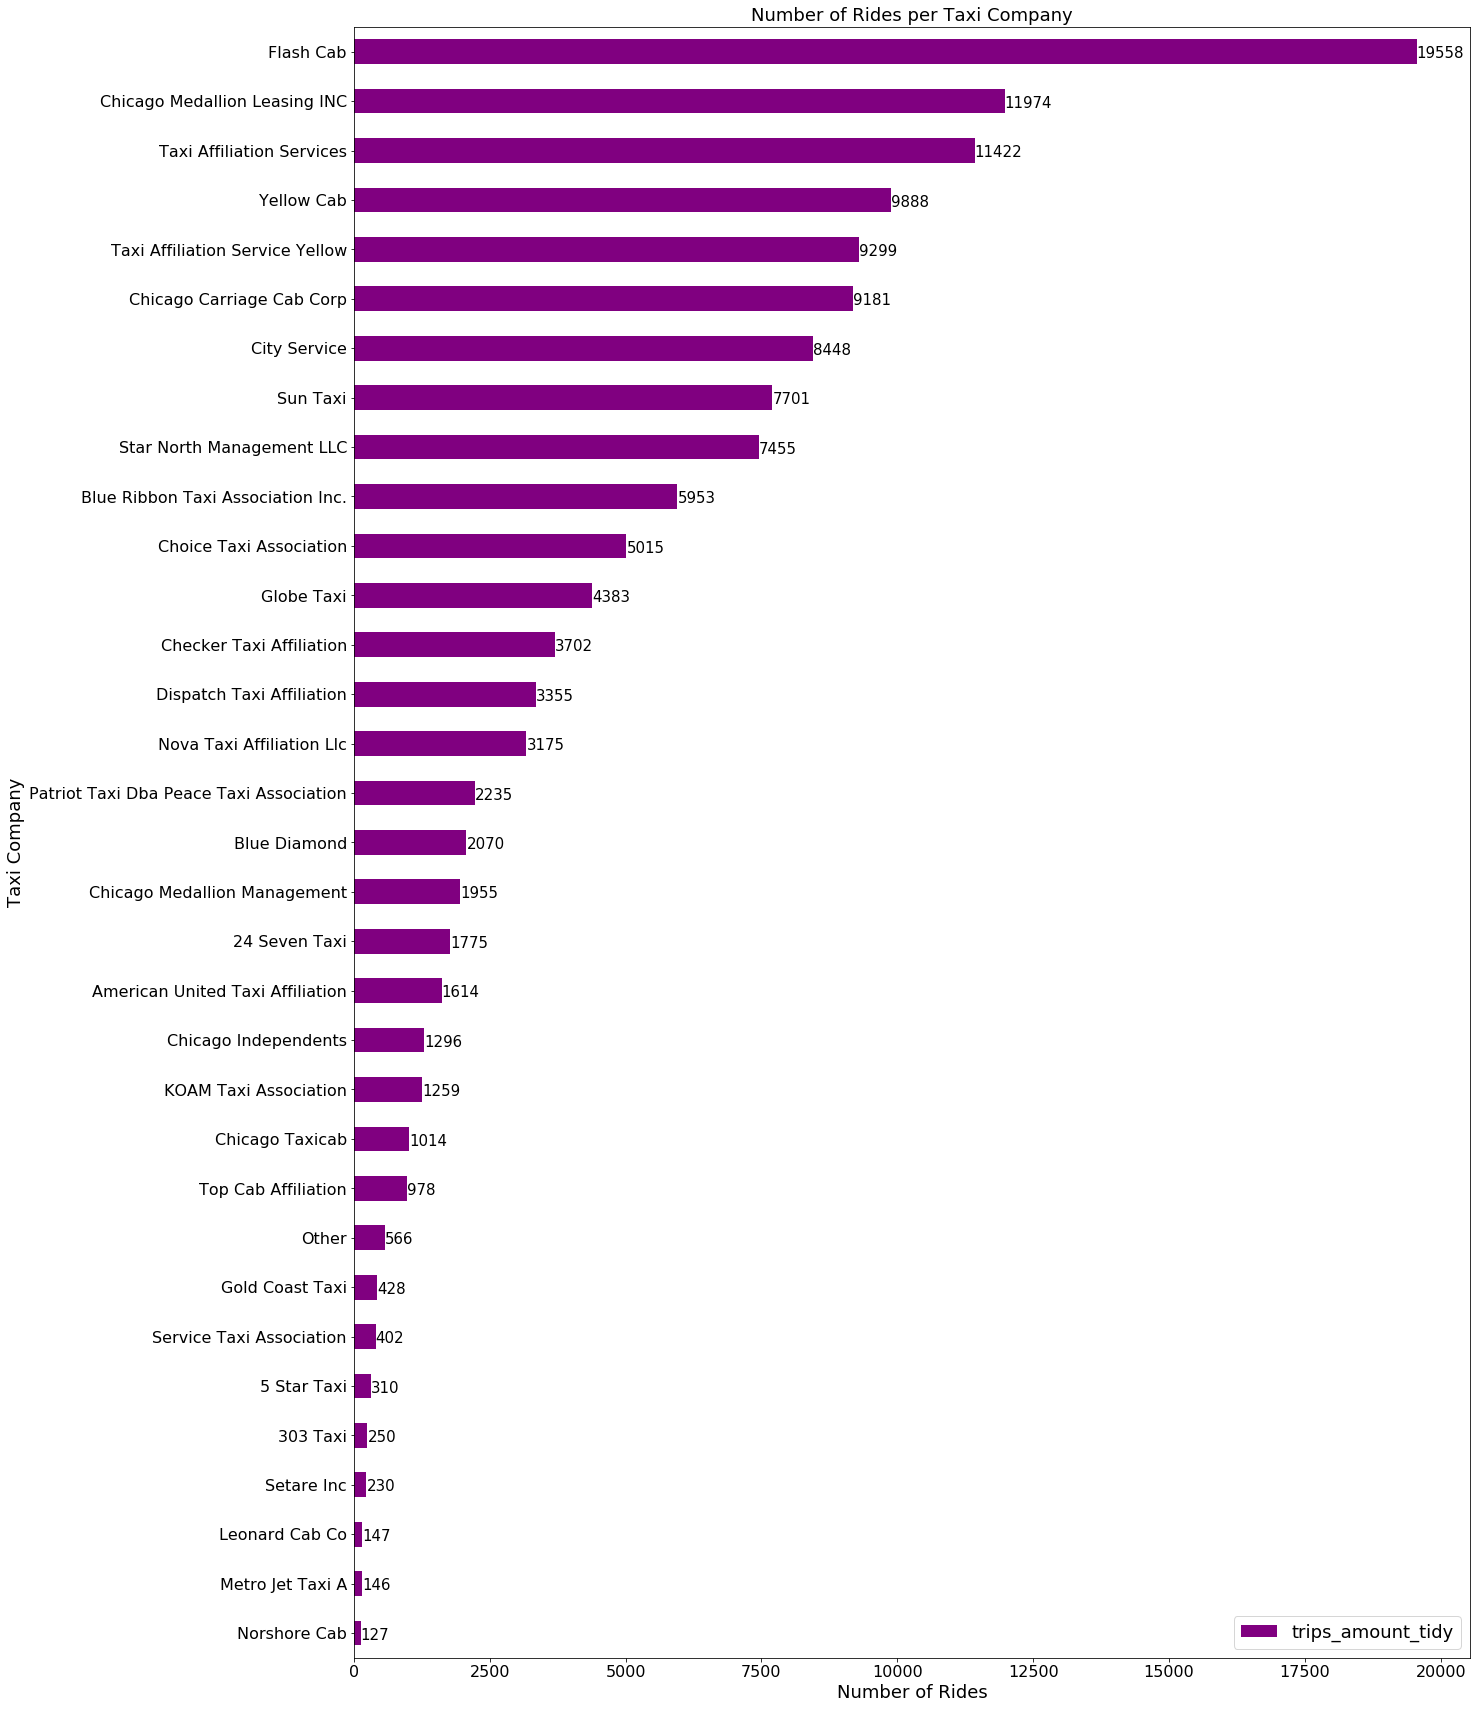

In [46]:
# Make a copy of 'company_name'. 
company_name_copy = plot_taxis['company_name_tidy']
plot_taxis['company_name_display'] = company_name_copy

# Replace the company name with 'Other' fpr those less than 40 trips. 
plot_taxis.loc[plot_taxis['trips_amount_tidy'] < 40, 'company_name_display'] = 'Other'

# Verify it worked. 
#plot_taxis.tail()

# Create a pivot table to group all the taxi companies that should go into 'Other'.
plot_taxis2 = plot_taxis.pivot_table(index='company_name_display', values = 'trips_amount_tidy', aggfunc = 'sum').sort_values('trips_amount_tidy', ascending=False).reset_index()
#plot_taxis2

# Replot the horizontal bar chart of the number of rides per taxi company. 
df_to_plot = plot_taxis2
x_axis = 'company_name_display'
y_axis = 'trips_amount_tidy'
chart_title = "Number of Rides per Taxi Company"
x_title = "Number of Rides"
y_title = "Taxi Company"

plot_barh(df_to_plot, x_axis, y_axis, chart_title, x_title, y_title)

Flash Cab is the clear winner. 

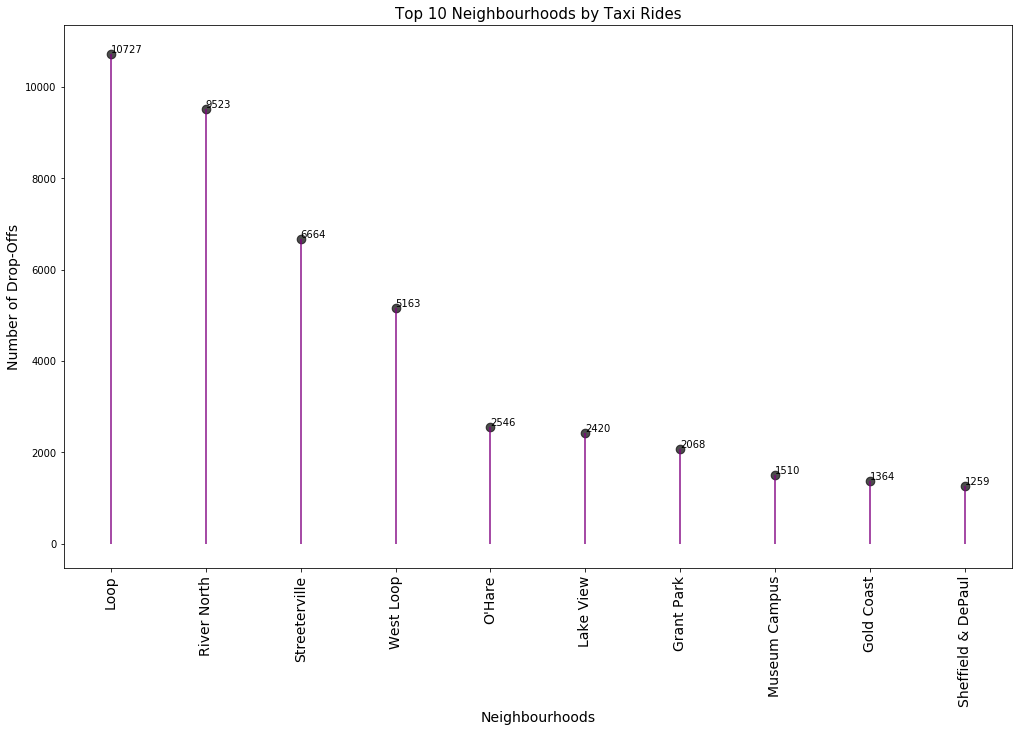

In [47]:
# Write a function to plot a lollypop chart.     
def plot_lolloypop_chart(df, x_grid, y_grid, y_bottom, l_color, d_color, c_title, y_label, x_label, col0, col1):

    #First create an empty canvas. 
    fig, ax = plt.subplots(figsize = (17, 10))

    # Plot the chart lines. 
    ax.vlines(x = x_grid, ymin = y_grid, ymax = y_bottom, color = l_color, alpha = 0.7, linewidth = 2) 

    # Plot the chart dots. 
    ax.scatter(x = x_grid, y = y_grid, s = 75, color = d_color, alpha = 0.7)

    # Label the chart. 
    ax.set_title(c_title, fontdict = {'size': 15})
    ax.set_ylabel(y_label, fontsize = 14)
    ax.set_xlabel(x_label, fontsize = 14)
    ax.set_xticks(x_grid)
    ax.set_xticklabels(x_grid, rotation = 90, fontsize = 14)

    # Add labels to the dots. 
    for row in df.itertuples():
        ax.text(row[1], row[2] + 30, s = round(row[2], 2))
        
        
# Plot the lollypop chart.
dataframe_to_plot = top10_neighbourhoods
x_axis = top10_neighbourhoods.dropoff_location_name
y_axis = top10_neighbourhoods.average_trips
y_lower_limit = 0
line_colour = 'purple'
dot_colour = 'black'
chart_title = 'Top 10 Neighbourhoods by Taxi Rides'
y_title = 'Number of Drop-Offs'
x_title = 'Neighbourhoods'
column0 = 'dropoff_location_name'
column1 = 'average_trips'

plot_lolloypop_chart(dataframe_to_plot, x_axis, y_axis, y_lower_limit, line_colour, dot_colour, chart_title, y_title, x_title, column0, column1)

The top 10 popular destination neighbourhoods in taxi rides are as above. 

<div style="border:solid green 2px; padding: 20px"> <b>Success:</b><br>
   It is great when the graph and its axes are signed.
This way it's easier to understand what's shown on the graph. It's especially great that you sign the columns with the actual values in your charts. Good job!☺️</div>       

### Draw conclusions based on each graph and explain the results <a class="anchor" id="section_5_3"></a>

[Go back to the Table of Contents](#table_of_contents)

[Neighbourhoods]
* The Loop is the "capital" of the city of Chicago, and the city's international airport is in O'Hare. The major popular neighbourhoods (see below) are all within walking distance from the Loop. It is understandable that these two locations rank high in the list. 



* The artsy River North, the luxury shopping Streetville district and the West Loop foodies' paradise all surround the Loop from the North-East to the West. The neighbourhoods have all the hallmarks of taxi ride destinations popular to both tourists and locals alike. 



* Lake View, Sheffield & DePaul and West Loop are three of the best residential areas in Chicago. Lake View is known for its arts and culture, and the neighbourhood of DePaul is home to DePaul University, the largest Catholic university in the US. The neighbouring Sheffield is a popular and logical choice for students to settle down during the semesters. Lake View is three neighbourhoods away to the North from the Loop, and Sheffield & DePaul, two neighbourds away. In other words, they are at a distance that is a little far for a stroll, but very convenient for a taxi ride. 



* Gold Coast, the historic district of Chicago, lies directly to the North of the Loop. Grant Park is Chicago's answer to New York's Central Park. Together with Museum Campus, a 57-acre museum park that sits near Lake Michigan in the West of the Loop, it is a nice short ride to these suburbs from the Loop.  



[Taxi Company Popularity]
* Flash Cab offers flat rates from the Loop to the suburbs for corporate account holders, and advertises that they provide a door-to-door service to the desired terminal gate at the airport for an attractive price. These service models seem to have helped them secure the leader's position. In terms of google search, Flash Cab does not appear on the first page of the search result, though it is the first one listed in the Related Searches at the bottom of the search result page.  



* Chicago Medallion Leasing INC (an affiliated company of Chicago Medallion Management Corp, which is also an affiliated company of City Service Taxi) is highly ranked on the first page in google search with both keywords, "taxi" and "cab". This visibility may be key to them gaining the number of rides. 



* Yellow Cab is the first to appear in google's organic search result (after the ads). This accessibility, together with the iconic association people have between the colour yellow and taxis, may be key to them being in the fourth place. 


* Taxi Affiliation Services have no company web site and do not publish a very clear description as to what exactly their business entails. In LinkedIn, they write that they "provide support services to transportation companies in five states and over twenty separate municipalities including Chicago, Baltimore, and New York City. TAS provides IT and dispatching services, insurance analysis, accounting and bookkeeping services, and back office support." It seems that they are a group of many taxi hire businesses. Their size may be key to them being in the third place. 

Note: many "affiliations" and "associations" catch the eye. The city of Chicago the taxi market to tens of thousands of for-hire vehicles - "rideshare" or Transportation Network Provider vehicles - in 2014. Three years later in 2017, thousands of small taxi operators found themselves unable to keep up with loan payments for their taxi medallions and high operating costs imposed by the city, and faced foreclosure on their medallions. They probably found a way to survive the sudden change in the business climate through uniting their businesses and working together as a group. 


Disclaimer: the search result I get now in 2021 is bound to be different than the data from 2017 that we were given for the project. 
<br>o The taxi company names that appear in the search result that do not appear in the data are businesses that were established after 2017 (e.g. Chicago Quick Taxi Cab Service has been in the business since a little over five years ago).
<br>o There is a really bad review for Flash Cab in yelp, which, in turn, ranks American United at the top. 

<div style="border:solid green 2px; padding: 20px"> <b>Success:</b><br>
   Great job! Thanks for the in-depth analysis and detailed conclusions 👏 </div>

## Testing Hypotheses <a class="anchor" id="chapter6"></a>

[Go back to the Table of Contents](#table_of_contents)

project_sql_result_07.csv contains the result of the last query - the data on rides from the Loop to O'Hare International Airport. Remember, these are the table's field values:
<br>o start_ts - pickup date and time
<br>o weather_conditions - weather conditions at the moment the ride started
<br>o duration_seconds - ride duration in seconds

Decide where to set the significance level (alpha) on your own.

Explain:
how you formed the null and alternative hypotheses
what criterion you used to test the hypotheses and why

### Hypothesis: "The average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays." <a class="anchor" id="section_6_1"></a>

[Go back to the Table of Contents](#table_of_contents)

In [48]:
# Add the day of the week to the dataset. 
data07['day_of_week'] = data07['start_ts'].dt.day_name()

# Check the result.
data07['day_of_week'].value_counts()

Saturday    871
Name: day_of_week, dtype: int64

All the dates in the dataset are Saturdays. 

In [49]:
# Look at the unique values of the categorical variable. 
data07['weather_conditions'].value_counts()

Good    723
Bad     148
Name: weather_conditions, dtype: int64

The ratio of 'Good' to 'Bad' weathers is almost 5 to 1 and, therefore, is unbalanced. However, we should be OK since we will be working with the average in each category. 

In [50]:
# Prepare the arrays, one for days with good weather and another for days with bad weather.
good_days = data07.query('weather_conditions == "Good"')
bad_days = data07.query('weather_conditions == "Bad"')

good_days = data07.loc[data07['weather_conditions'] == 'Good', 'duration_seconds']
bad_days = data07.loc[data07['weather_conditions'] == 'Bad', 'duration_seconds']

# View the datasets.
#good_days
#bad_days

In [51]:
# Write a function for peforming some preliminary checks in order to know which statistical test to choose.
def get_stats(name1, name2, df1, df2):
    
    # Check the sample sizes.
    sample_size1 = len(df1)
    sample_size2 = len(df2)
    print(name1, 'sample size:', sample_size1)
    print(name2, 'sample size:', sample_size2)
    print()

    # Calculate the means of the ride durations.
    average_ride_duration1 = round(df1.mean(), 2)
    average_ride_duration2 = round(df2.mean(), 2)
    print(name1, 'average ride duration:', average_ride_duration1)
    print(name2, 'average ride duration:', average_ride_duration2)
    print()

    # Calculate the variances.
    variance1 = df1.var()
    variance2 = df2.var()
    print(name1, 'variance:', variance1)
    print(name2, 'variance:', variance2)
    print()

    # Calculate the standard deviation.
    std1 = df1.std()
    std2 = df2.std()
    print(name1, 'std:', std1)
    print(name2, 'std:', std2)

# Call the function.
sample_name1 = 'good days'
sample_name2 = 'bad days'
sample1 = good_days
sample2 = bad_days

get_stats(sample_name1, sample_name2, sample1, sample2)

good days sample size: 723
bad days sample size: 148

good days average ride duration: 2032.25
bad days average ride duration: 2409.23

good days variance: 598216.951081022
bad days variance: 564819.443463872

good days std: 773.4448597547353
bad days std: 751.5447049004283


The standard deviations of the two samples are different. There is no need to run Levene's test.

The standard deviations of the two samples are different but the sample sizes are very different, too. So let's check their variances with Levene's test to be doubly sure.

A null hypothesis takes the form of "the measures of location of two populations are equal to each other". So, in our case, the null hypothesis will be:

* H0 = "The variance of the sample of ride durations from the Loop to O'Hare International Airport on Saturdays with good weather is equal to that of the sample of ride durations between the same two locations on Saturdays with bad weather."

In case the null hypothesis is rejected, i.e. there is sufficient evidence against it, we need to set up the hypothesis for the not-equal-to alternative. So, in our case, the alternative hypothesis will be:

* H1 = "The variance of the sample of ride durations from the Loop to O'Hare International Airport on Saturdays with good weather is different from that of the sample of ride durations between the same two locations on Saturdays with bad weather."

Note: in Levene's test, a small p-value suggests that the populations do NOT have equal variances, i.e.

If pvalue < 0.05, it implies unequal variances, therefore, go for H1.
<br>If pvalue >= 0.05, it implies equal variances, therefore, go for H0.

<div style="border:solid orange 2px; padding: 20px"> <b>Remarks:</b><br>
    Please, pay attention, that "equal" conception is not appliable in case of distributions. It's better to use "statistical insignificant difference" or "belonging to the same statistical population"  to formulate the null hypothesis instead of it.</div>

Check the data distribution to decide whether to go for the median-based test or the mean-based test. 

Three variations of Levene’s test are possible. The possibilities and their recommended usages are:
* ‘median’ : Recommended for skewed (non-normal) distributions.
* ‘mean’ : Recommended for symmetric, moderate-tailed distributions.
* ‘trimmed’ : Recommended for heavy-tailed distributions.

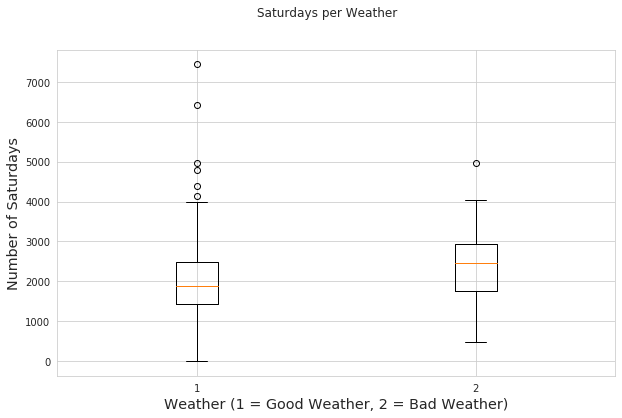

In [52]:
# Write a function that plot two boxplots side by side. 
def plot_side_by_side_boxplots(df1, df2, c_title, c_xlabel, c_ylabel):

    sns.set_style("whitegrid")
    plt.figure(figsize=(10,6))
    plt.suptitle(c_title)
    plt.xlabel(c_xlabel, size= 'x-large')
    plt.ylabel(c_ylabel, size='x-large')
    plt.ticklabel_format(useOffset = False, style = 'plain', axis='y')
    plt.boxplot([df1, df2])
    plt.show()
    
# Plot boxplots for the data slices. 
sample1 = good_days
sample2 = bad_days
chart_title = "Saturdays per Weather"
chart_xlabel = 'Weather (1 = Good Weather, 2 = Bad Weather)'
chart_ylabel = 'Number of Saturdays'

plot_side_by_side_boxplots(sample1, sample2, chart_title, chart_xlabel, chart_ylabel)

The graphs are skewed to the right. So go for the median-based test. 

In [53]:
# Write a function that performs Levene's test.
def run_levenes_test(df1, df2, b, a):
    
    # Set the critical statistical significance. 
    alpha = a

    # Levene's test
    results = st.levene(df1, df2, center = b)
    print(b, '-based p-value:', results.pvalue)

    if results.pvalue < alpha:
        print('We reject the null hypothesis centered at the', b)
    else:
        print("We can't reject the null hypothesis centered at the", b) 
              
# Run the test. 
sample1 = good_days
sample2 = bad_days
base = 'median'
critical_value = 0.05

run_levenes_test(sample1, sample2, base, critical_value)

median -based p-value: 0.9806770360671218
We can't reject the null hypothesis centered at the median


The pvalue is greater than 0.05, which means the variances of the two samples are deemed equal, i.e. we go for H0.

<div style="border:solid green 2px; padding: 20px"> <b>Success:</b><br>
    Well done for making the necessary checks to choose which statistical test is best to use in this case 👍 </div>       

**Formulate the null and alternative hypotheses and explain how.**

We have two samples of ride durations: one on Saturdays with good weather, and another on Saturdays with bad weather. The two samples are independent of each other. We want to compare the mean ride durations of these two samples. 

The null hypothesis will be:

* H0 = "The average duration of rides from the Loop to O'Hare International Airport on Saturdays with good weather is equal to that of rides between the same two locations on Saturdays with bad weather."

The alternative hypothesis will be:

* H1 = "The average duration of rides from the Loop to O'Hare International Airport on Saturdays with good weather is different from that of rides between the same two locations on Saturdays with bad weather."


**Explain the criterion you used to test the hypotheses and why.**

Use Welch's t-test
<br>Reason: Welch's t-test allows us to compare two datasets and not just the two mean values. At first glance, the mean ride durations of the two samples are not close. Whether or not the difference between these numbers is significant depends on the variances of the samples, which were confirmed to be equal by Levene's test. The sizes of the two samples are very different.

Welch's test is an adaptation of Student's t-test, and is more reliable when the two samples have unequal variances and/or unequal sample sizes like they are in our case. 


When performing the statistical test, set the following criteria: 
* Set equal_var = True
<br>Reason: the variances of the two samples are deemed equal.
* Set the statistical significance level of 5%, i.e. alpha = 0.05
<br>Reason: since this is not a test that needs strict accuracy, we are using the most commonly used value. 

If the p-value is less than alpha, we reject the hypothesis. 

If pvalue < 0.05, we reject the hypothesis, therefore, go for H1.
If pvalue >= 0.05, we accept the hypothesis, therefore, go for H0.

In [54]:
# Write a function that performs Welch's test.
def run_welchs_test(df1, df2, var_bool, a):

    # Take the standard accepted value for the critical statistical significance.
    alpha = a

    results = st.ttest_ind(df1, df2, equal_var=var_bool)

    print('p-value:', results.pvalue)

    if results.pvalue < alpha:
        print('We reject the null hypothesis')
    else:
        print("We can't reject the null hypothesis") 

# Run the test. 
sample1 = good_days
sample2 = bad_days
var_equality = True
critical_value = 0.05

run_welchs_test(sample1, sample2, var_equality, critical_value)

p-value: 7.397770692813604e-08
We reject the null hypothesis


The p-value tells us that there is a 7.4e-06% probability of getting a difference that size or larger, assuming that H0 is correct. Since the p-value is very small, it indicates that such an observed outcome would be highly unlikely under the null hypothesis, meaning "The average duration of rides from the Loop to O'Hare International Airport on Saturdays with good weather is different from that of rides between the same two locations on Saturdays with bad weather.". 

### Conclusion <a class="anchor" id="section_6_2"></a>

[Go back to the Table of Contents](#table_of_contents)

Our hypothesis that the duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays was tested using Levene's and Welch's tests and was accepted. A ride on a Saturday when the weather is bad tends to be longer than a ride on a Saturday when the weather is good. Probably, this is related to people being cautious and driving more slowly due to treacherous road conditions when the weather is bad. 

<div style="border:solid green 2px; padding: 20px"> <b>Success:</b><br>
    The statistical test is correct and we reject the null hypothesis. It's great that you wrote your assumption as to why this is happening.</div>   

## Overall conclusion <a class="anchor" id="chapter7"></a>

[Go back to the Table of Contents](#table_of_contents)

In preparation for the business launch in Chicago, Zuber would like to find out about popular destinations in the local scene, conduct some competitive analysis, and check whether or not weather has any effect on ride durations. 


A few suggestions as a result of analysing the given data:

* In addition to the traffic conditions, take the road conditions into account as influenced by the weather. Advise customers to leave early because the ride is expected to be longer than usual due to bad weather causing bad traffic conditions on weekends, for example. People like to know what is going to happen. People do not like surprises. Communication is key. 


* Have a "Bad Weather Day" promo and make the ride service visible and accessible at an affordable price on bad weather. It is along the lines of umbrella shops raking in on a rainy day. 


* Raise visibility by being ranked high in search results, and use eye-catching ads. Make the ride service accessible both on the web and mobile with a light and simple UI. 


* Incorporate information about the local neighbourhoods. Ask customers what they are looking for and make suggestions on where to go. 


* Divide the area map of the city of Chicago and its suburbs into zones of concentric circles much like the London Underground where each zone contains several neighbourhoods. Instead of using the meter or quoting a per-destination price prior to the journey, lay out in the open the exact fares on a zone-base. It enhances the impression of freedom of mobility, flexibility and accessibility. Transparency is key. 


* Personalise each ride to accommodate for customers' wishes and preferences. Collect data to understand the range of reasons why a person might choose a taxi over the public transport (convenience of being able to take a direct route, privacy and intimacy with other riders, the attention on detail from a customer service minded driver,...etc).



<br>[Datasets]
1. The names of taxi company names and the number of rides for each company for November 15-16, 2017
2. The names of Chicago neighbourhoods which were the customers' destinations and the number of trips taken to each of those destinations in November 2017
3. The result of the last SQL query run on the Platform, which is the the pickup date and time, the weather (either good or bad), and the ride duration in seconds
 


<br>[Specifics - Data preprocessing (on the Platform)]
* A webpage in HTML format was parsed to extract the data on weather in Chicago in November 2017. 


* Various SQL queries were written to extract data from a database:
<br>o the number of rides per taxi company for November 15-16, 2017
<br>o the number of rides for taxi companies whose name contains "Yellow" or "Blue" for November 1-7, 2017
<br>o the number of rides of two most popular taxi companies, placing the rest into a single group for November 1-7, 2017
<br>o the IDs for two neighbourhoods specified
<br>o the hourly weather conditions, categorised into 'Good' and 'Bad'
<br>o all the rides between the Loop and O'Hare International Airport in Chicago on a Saturday, indicating the duration of the ride, the day's weather condition (Note: the rides where no information is available on the weather condition were excluded) 


<br>[Specifics - Data preprocessing (on jupyter hub)]
* Column value renaming
<br>o Inconsistency in the naming format was resolved to enable alphabetical sorting in 'company_name'. 


* Data type conversions
<br>o The data type of 'average_trips' was converted from float to int to be consistent with the data type of 'trips_amount' and also it makes more sense to express the number of trips in whole numbers. 
<br>o The data type of 'start_ts' was converted from object to datetime to enable datetime operations.
<br>o The data type of 'duration_seconds' was converted from float to int to round off the values to the nearest seconds. 


* Removal of duplicates
<br>o After the variations in 'company_name' was resolved, duplicates were identified which were then removed. 
<br>o Complete duplicates were removed from the dataset of weather conditions. 

Note: there were no missing values in the three datasets given. 



<br>[Specifics - Analysis]
* The top ten neighbourhoods in Chicago were identified and a lolloypop chart was plotted to compare the popularity in terms of the number of rides which terminated at those destinations. 

* A bar chart was plotted to compare the popularity of taxi companies in terms of the number of rides.

* The reasons for popularity of the top ten neighbourhoods were investigated. Some neighbourhoods are bustling with arts and culture, some offer a plethora of culinary experiences, some are sought-after residential areas, and some are a university town and its neighbour with convenient accommodations for students. 

* The reasons for popularity of the top four taxi companies seem to be "low-margin high-turnover" business models, a membership with benefits for regular rides, high visibility and accessibility in web search results and impressionable choice of company names. 


<br>[Specifics - Testing the hypothesis]
<br>Our hypothesis that the duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays was tested using Levene's and Welch's tests and was accepted. A ride on a Saturday when the weather is bad tends to be longer than a ride on a Saturday when the weather is good. Probably, this is related to people being cautious and driving more slowly due to treacherous road conditions when the weather is bad. 

<br>Note: the project description on the platform says that we will be testing "test a hypothesis about the impact of weather on ride frequency" but we tested on ride duration instead.

<div style="border:solid green 2px; padding: 20px"> <b>Success:</b><br>
    Well done, you wrote detailed conclusions. Thanks a lot for your work! 🙂  </div>   